In [450]:
import pandas as pd
import numpy as np
import os
import os.path
from datetime import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

# Loading original data set 

FILE_PATH = os.path.abspath(os.path.dirname('data/cities_after_eda.csv'))
location_df = pd.read_csv(FILE_PATH + '/cities_after_eda.csv')

# #Replacing the names of cities with underscores 
# cities.replace('\s+', '_',regex=True,inplace=True)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6


In [451]:
# # Convert strings to Date time
location_df['Date time'] = pd.to_datetime(location_df['Date time'], errors = 'coerce')

In [453]:
cities_df = location_df.copy()

In [454]:
cities_df['Date time'] = cities_df['Date time'].astype(str)

In [455]:
cities_df['Date time'] = cities_df['Date time'].str.replace('-','')
cities_df['Date time']

0         20190101
1         20190102
2         20190103
3         20190104
4         20190105
            ...   
560693    20181227
560694    20181228
560695    20181229
560696    20181230
560697    20181231
Name: Date time, Length: 560698, dtype: object

In [456]:
cities_df.dtypes

City                           object
State                          object
Date time                      object
Conditions                     object
Latitude                      float64
Longitude                     float64
Temperature (degF)            float64
Minimum Temperature (degF)    float64
Maximum Temperature (degF)    float64
Relative Humidity (%)         float64
Cloud Cover (%)               float64
Precipitation (in)            float64
Precipitation Cover (%)       float64
Wind Direction                float64
Wind Speed (mph)              float64
Snow Depth (in)               float64
Snow (in)                     float64
Dew Point (degF)              float64
Visibility (mi)               float64
dtype: object

In [459]:
location_df.dtypes

City                                  object
State                                 object
Date time                     datetime64[ns]
Conditions                            object
Latitude                             float64
Longitude                            float64
Temperature (degF)                   float64
Minimum Temperature (degF)           float64
Maximum Temperature (degF)           float64
Relative Humidity (%)                float64
Cloud Cover (%)                      float64
Precipitation (in)                   float64
Precipitation Cover (%)              float64
Wind Direction                       float64
Wind Speed (mph)                     float64
Snow Depth (in)                      float64
Snow (in)                            float64
Dew Point (degF)                     float64
Visibility (mi)                      float64
dtype: object

In [460]:
cities_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,20190101,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,20190102,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,20190103,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3
3,Akron,OH,20190104,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9
4,Akron,OH,20190105,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6


In [461]:
cities_df.isnull().sum()

City                          0
State                         0
Date time                     0
Conditions                    1
Latitude                      0
Longitude                     0
Temperature (degF)            1
Minimum Temperature (degF)    1
Maximum Temperature (degF)    1
Relative Humidity (%)         1
Cloud Cover (%)               1
Precipitation (in)            0
Precipitation Cover (%)       1
Wind Direction                1
Wind Speed (mph)              1
Snow Depth (in)               1
Snow (in)                     1
Dew Point (degF)              1
Visibility (mi)               1
dtype: int64

In [462]:
# Replace null value in Conditions column with the most common value
cities_df['Conditions']= cities_df[['Conditions']].apply(lambda x: x.fillna(x.value_counts().index[0]))
cities_df['Conditions'].isnull().sum()

0

In [463]:
# Now Conditions feature has no Null values
cities_df.isnull().sum()

City                          0
State                         0
Date time                     0
Conditions                    0
Latitude                      0
Longitude                     0
Temperature (degF)            1
Minimum Temperature (degF)    1
Maximum Temperature (degF)    1
Relative Humidity (%)         1
Cloud Cover (%)               1
Precipitation (in)            0
Precipitation Cover (%)       1
Wind Direction                1
Wind Speed (mph)              1
Snow Depth (in)               1
Snow (in)                     1
Dew Point (degF)              1
Visibility (mi)               1
dtype: int64

In [464]:
# Null value percentage
round(100*(cities_df.isnull().sum()/len(cities_df.index)), 2)

City                          0.0
State                         0.0
Date time                     0.0
Conditions                    0.0
Latitude                      0.0
Longitude                     0.0
Temperature (degF)            0.0
Minimum Temperature (degF)    0.0
Maximum Temperature (degF)    0.0
Relative Humidity (%)         0.0
Cloud Cover (%)               0.0
Precipitation (in)            0.0
Precipitation Cover (%)       0.0
Wind Direction                0.0
Wind Speed (mph)              0.0
Snow Depth (in)               0.0
Snow (in)                     0.0
Dew Point (degF)              0.0
Visibility (mi)               0.0
dtype: float64

<AxesSubplot:xlabel='Visibility (mi)'>

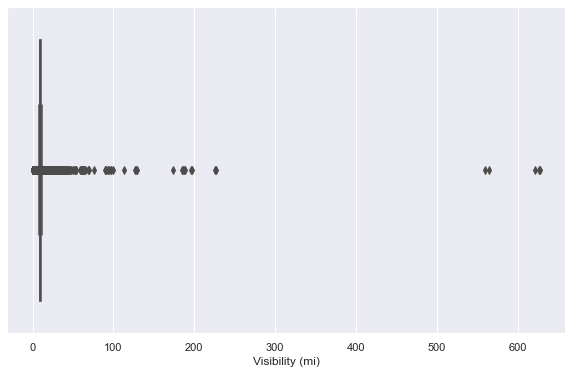

In [465]:
import seaborn as sns; sns.set(color_codes=True)
#Check for outliers using boxplot: Visibility feature
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(x = cities_df['Visibility (mi)'])

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Visibility (mi)', ylabel='Density'>

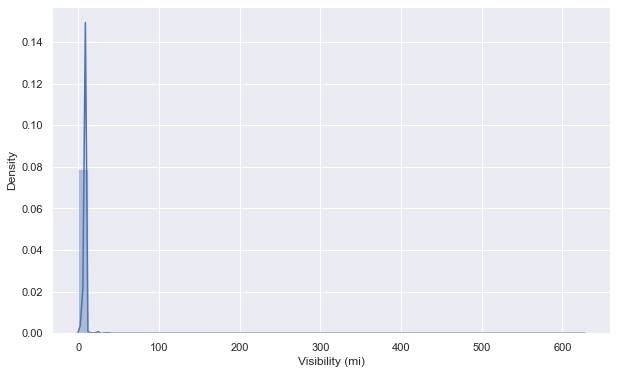

In [466]:
#Check for outliers using distribution plot: Visibility feature 
fig, ax = plt.subplots(figsize = (10, 6))
sns.distplot(cities_df['Visibility (mi)'])

In [467]:
cities_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,20190101,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,20190102,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,20190103,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3
3,Akron,OH,20190104,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9
4,Akron,OH,20190105,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6


In [468]:
# Describe numerical features
cities_df.describe(exclude=['O'])

,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
count,560698.000000,560698.000000,560697.000000,560697.000000,560697.000000,560697.000000,560697.000000,560698.000000,560697.000000,560697.000000,560697.000000,560697.000000,560697.000000,560697.000000,560697.000000
mean,37.621192,-94.247102,58.067724,49.024798,67.662816,67.885239,39.700016,0.109232,10.104681,180.886972,13.925333,0.717416,0.084770,45.617071,9.295278
std,5.850423,16.927785,18.267230,18.072315,19.644071,16.716752,30.053062,0.352922,18.278813,69.135305,5.444727,4.659303,0.906783,18.571817,2.851307
min,21.304900,-157.858000,-45.900000,-49.000000,-43.000000,3.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-54.400000,0.000000
25%,33.693700,-108.564450,44.900000,35.800000,53.900000,58.800000,12.400000,0.000000,0.000000,130.750000,10.100000,0.000000,0.000000,31.800000,9.000000
50%,38.048600,-88.952100,60.300000,50.200000,70.900000,70.620000,36.500000,0.000000,0.000000,180.960000,13.200000,0.000000,0.000000,46.800000,9.800000
75%,41.884300,-81.045370,73.000000,63.600000,83.300000,79.810000,63.700000,0.040000,12.500000,232.380000,17.000000,0.000000,0.000000,60.900000,9.900000
max,64.845300,-68.770770,108.100000,98.100000,121.600000,100.000000,100.000000,30.080000,100.000000,357.920000,134.400000,133.070000,116.930000,82.000000,627.400000


In [469]:
# Describe catgorical features
cities_df.describe(exclude='number')

,City,State,Date time,Conditions
count,560698,560698,560698,560698
unique,348,49,1537,9
top,Springfield,CA,20200628,Clear
freq,6144,61443,365,190806


In [470]:
cities_df['Conditions'].value_counts()

Clear                     190806
Partially cloudy          136720
Rain, Partially cloudy     99373
Rain, Overcast             53281
Overcast                   23499
Rain                       21816
Snow, Partially cloudy     15829
Snow, Overcast             15013
Snow                        4361
Name: Conditions, dtype: int64

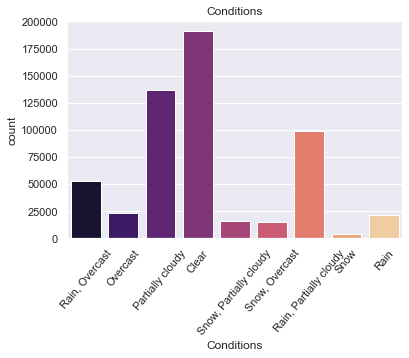

In [471]:
conditions = sns.countplot(x = 'Conditions', data = cities_df, palette = 'magma')
conditions.set_xticklabels(conditions.get_xticklabels(), rotation=50)
plt.title('Conditions')
plt.show()

In [472]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560698 entries, 0 to 560697
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   City                        560698 non-null  object 
 1   State                       560698 non-null  object 
 2   Date time                   560698 non-null  object 
 3   Conditions                  560698 non-null  object 
 4   Latitude                    560698 non-null  float64
 5   Longitude                   560698 non-null  float64
 6   Temperature (degF)          560697 non-null  float64
 7   Minimum Temperature (degF)  560697 non-null  float64
 8   Maximum Temperature (degF)  560697 non-null  float64
 9   Relative Humidity (%)       560697 non-null  float64
 10  Cloud Cover (%)             560697 non-null  float64
 11  Precipitation (in)          560698 non-null  float64
 12  Precipitation Cover (%)     560697 non-null  float64
 13  Wind Direction

In [473]:
location_df['Month'] = location_df["Date time"].dt.month
location_df['Year'] = location_df["Date time"].dt.year
location_df['Day'] = location_df["Date time"].dt.day

In [475]:
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5


In [476]:
import numpy as np
# Create Winter season column
cond = [(location_df['Month'] == 12), (location_df['Month'] == 1), (location_df['Month'] == 2)]

# create a list of the values we want to assign for each condition
values = ['December', 'January', 'February']

location_df['Winter'] = np.select(cond, values)
location_df

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter
0,Akron,OH,2019-01-01,"Rain, Overcast",41.08430,-81.51430,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January
1,Akron,OH,2019-01-02,Overcast,41.08430,-81.51430,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January
2,Akron,OH,2019-01-03,Partially cloudy,41.08430,-81.51430,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January
3,Akron,OH,2019-01-04,Clear,41.08430,-81.51430,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January
4,Akron,OH,2019-01-05,Clear,41.08430,-81.51430,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560693,Yuma,AZ,2018-12-27,Partially cloudy,32.68549,-114.62461,53.1,41.0,65.0,41.90,41.0,0.00,0.00,132.50,13.9,0.0,0.0,28.6,8.8,12,2018,27,December
560694,Yuma,AZ,2018-12-28,Clear,32.68549,-114.62461,52.5,44.1,57.8,26.83,21.6,0.00,0.00,332.92,15.0,0.0,0.0,18.3,8.9,12,2018,28,December
560695,Yuma,AZ,2018-12-29,Clear,32.68549,-114.62461,49.5,43.1,56.9,26.14,0.0,0.00,0.00,177.08,23.0,0.0,0.0,15.8,9.9,12,2018,29,December
560696,Yuma,AZ,2018-12-30,Clear,32.68549,-114.62461,48.9,39.8,60.2,28.41,0.0,0.00,0.00,132.22,9.2,0.0,0.0,16.6,9.9,12,2018,30,December


In [477]:
# Create Spring Season column 
cond = [(location_df['Month'] == 3), (location_df['Month'] == 4), (location_df['Month'] == 5)]

# create a list of the values we want to assign for each condition
values = ['March', 'April', 'May']

location_df['Spring'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0


In [478]:
# Create Summer season column 
cond = [(location_df['Month'] == 6), (location_df['Month'] == 7), (location_df['Month'] == 8)]

# create a list of the values we want to assign for each condition
values = ['June', 'July', 'August']

location_df['Summer'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0


In [479]:
# Create Summer season column 
cond = [(location_df['Month'] == 6), (location_df['Month'] == 7), (location_df['Month'] == 8)]

# create a list of the values we want to assign for each condition
values = ['June', 'July', 'August']

location_df['Summer'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0


In [480]:
# Create Fall season column 
cond = [(location_df['Month'] == 9), (location_df['Month'] == 10), (location_df['Month'] == 11)]

# create a list of the values we want to assign for each condition
values = ['September', 'October', 'November']

location_df['Fall'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer,Fall
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0,0


In [507]:
# Display Locations that have cold and not cold winters 
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 500)
location_df['Cold_In_Winter_Cities'] = np.where(((location_df['Winter'] != 0) & ((location_df['Temperature (degF)']) <= 46.0)), 'In This City Winters Are Cold', 'In This City Winters Are Not Cold')

winter = location_df.groupby(['City', 'State'])['Cold_In_Winter_Cities']
winter.first()

City                State
Akron               OH           In This City Winters Are Cold
Albany              GA       In This City Winters Are Not Cold
                    NY           In This City Winters Are Cold
                    OR           In This City Winters Are Cold
Albuquerque         NM           In This City Winters Are Cold
Alexandria          LA       In This City Winters Are Not Cold
Allentown           PA       In This City Winters Are Not Cold
Altoona             PA           In This City Winters Are Cold
Amarillo            TX           In This City Winters Are Cold
Anacortes           WA           In This City Winters Are Cold
Anaheim             CA       In This City Winters Are Not Cold
Anchorage           AK           In This City Winters Are Cold
Anderson            IN           In This City Winters Are Cold
Ann Arbor           MI           In This City Winters Are Cold
Appleton            WI           In This City Winters Are Cold
Arlington           TX       

In [511]:
len(location_df['City'].unique())
cold = location_df['Cold_In_Winter_Cities'].value_counts()
cold

In This City Winters Are Not Cold    410769
In This City Winters Are Cold        149929
Name: Cold_In_Winter_Cities, dtype: int64

In [512]:
# Create a new DF with locations and Cities have winter 
winter_df = location_df[['City', 'State', 'Cold_In_Winter_Cities']]
winter_df = winter_df.drop_duplicates(subset=['City', 'State'])

In [513]:
# Create a list of all years and months
month_list = (location_df['Month'].unique()).tolist()

In [514]:
# Create a list of all locations 
city = (location_df['City'].unique()).tolist()
state = (location_df['State'].unique()).tolist()

In [515]:
# Created a new dataframe to calculate average temperature per month per city  

cities_per_month = location_df.filter(['City', 'State', 'Temperature (degF)', 'Minimum Temperature (degF)', 'Maximum Temperature (degF)', 'Date time', 'Month'], axis=1)
cities_per_month

,City,State,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Date time,Month
0,Akron,OH,41.3,35.7,60.8,2019-01-01,1
1,Akron,OH,37.3,34.0,41.7,2019-01-02,1
2,Akron,OH,33.1,29.9,36.8,2019-01-03,1
3,Akron,OH,36.7,29.9,48.5,2019-01-04,1
4,Akron,OH,40.2,30.4,48.6,2019-01-05,1
...,...,...,...,...,...,...,...
560693,Yuma,AZ,53.1,41.0,65.0,2018-12-27,12
560694,Yuma,AZ,52.5,44.1,57.8,2018-12-28,12
560695,Yuma,AZ,49.5,43.1,56.9,2018-12-29,12
560696,Yuma,AZ,48.9,39.8,60.2,2018-12-30,12


In [519]:
# Average temperature per city per month
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 10000)
grouped = cities_per_month.groupby(['City', 'State','Month'])
avg_temp_df = grouped.mean().reset_index()
avg_temp_df = avg_temp_df.rename(columns={"Temperature (degF)": "Avg_Temp (degF)", "Minimum Temperature (degF)": "Avg_Min_Temp (degF)", "Maximum Temperature (degF)": "Avg_Max_Temp (degF)"})
avg_temp_df.head(3)

,City,State,Month,Avg_Temp (degF),Avg_Min_Temp (degF),Avg_Max_Temp (degF)
0,Akron,OH,1,31.172258,25.014839,37.494194
1,Akron,OH,2,34.370922,26.408511,41.643972
2,Akron,OH,3,39.612057,30.921986,47.899291


In [520]:
(avg_temp_df.loc[(avg_temp_df['City']=='Akron')& (avg_temp_df['State']=='OH') & (avg_temp_df['Month'] == 2)]).to_json()

'{"City":{"1":"Akron"},"State":{"1":"OH"},"Month":{"1":2},"Avg_Temp (degF)":{"1":34.3709219858},"Avg_Min_Temp (degF)":{"1":26.4085106383},"Avg_Max_Temp (degF)":{"1":41.6439716312}}'

In [521]:
# Create a function that takes a location and month as an input and outputs average temperature 
def temperature_per_month(city, state, month):
    avg = (avg_temp_df.loc[(avg_temp_df['City']==city) & (avg_temp_df['State']==state) & (avg_temp_df['Month'] == month)]).to_json()
    return avg

In [522]:
# TEST INPUT LOCATION AND OUTPUT THE AVERAGE TEMPERATURE PER MONTH 
print(temperature_per_month('Yuma', 'AZ', 2))    

{"City":{"4369":"Yuma"},"State":{"4369":"AZ"},"Month":{"4369":2},"Avg_Temp (degF)":{"4369":60.465248227},"Avg_Min_Temp (degF)":{"4369":50.1567375887},"Avg_Max_Temp (degF)":{"4369":71.5241134752}}


In [523]:
# Test input location and output the average temperature per month 
print(temperature_per_month('San Francisco', 'CA', 12))    

{"City":{"3455":"San Francisco"},"State":{"3455":"CA"},"Month":{"3455":12},"Avg_Temp (degF)":{"3455":52.3491935484},"Avg_Min_Temp (degF)":{"3455":46.0725806452},"Avg_Max_Temp (degF)":{"3455":59.125}}


In [524]:
# Create a function that takes a location and outputs whether   
def winters_cold(city, state):
    winter = (winter_df.loc[(winter_df['City']==city) & (winter_df['State']==state)]).to_json()
    return winter

In [526]:
# TEST INPUT LOCATION AND OUTPUT THE AVERAGE TEMPERATURE PER MONTH 
print(winters_cold('San Diego', 'CA'))    

{"City":{"230570":"San Diego"},"State":{"230570":"CA"},"Cold_In_Winter_Cities":{"230570":"In This City Winters Are Not Cold"}}


In [527]:
print(winters_cold('Tampa', 'FL'))  

{"City":{"259588":"Tampa"},"State":{"259588":"FL"},"Cold_In_Winter_Cities":{"259588":"In This City Winters Are Not Cold"}}


In [529]:
print(winters_cold('Albany', 'NY'))  

{"City":{"1614":"Albany"},"State":{"1614":"NY"},"Cold_In_Winter_Cities":{"1614":"In This City Winters Are Cold"}}


In [531]:
import sklearn
from sklearn.model_selection import train_test_split
import category_encoders as ce 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from scipy.stats import randint
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [549]:
# Prepare Dataframe for predictions
cities_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,730.0,4.0,41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,731.0,1.0,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,732.0,2.0,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3
3,Akron,OH,733.0,0.0,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9
4,Akron,OH,734.0,0.0,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6


In [550]:
loc = (cities_df.groupby(['City', 'State'], as_index=False))

In [551]:
from sklearn.preprocessing import OrdinalEncoder

# Encode the Conditions column

ord_enc = OrdinalEncoder()
cities_df['Conditions'] = ord_enc.fit_transform(cities_df['Conditions'].values.reshape(-1, 1))
cities_df['Conditions'].dtype

# Encode Date time column
cities_df['Date time'] = ord_enc.fit_transform(cities_df['Date time'].values.reshape(-1, 1))
cities_df['Date time'].dtype

dtype('float64')

In [562]:
import pickle
from sklearn.tree import DecisionTreeRegressor 

# Create a pipline. Since we have outliers, as we have seen earlier, we will impute with median values
# clf = make_pipeline(
#     ce.ordinal.OrdinalEncoder(),
#     SimpleImputer(strategy = 'median'),
#     StandardScaler(),
#     RandomForestRegressor(n_estimators=200,n_jobs=-1, random_state=42))

clf = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy = 'median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=200,n_jobs=-1, random_state=42)
)

In [563]:
# clf = joblib.load('weather_predictor.pkl')

In [564]:
# Split data into Training and Testing for each location
training = cities_df.groupby(['City', 'State'], as_index=False).apply(lambda x: x.sample(frac=0.8))
training.head()

City State  Date time  Conditions  Latitude  Longitude  \
0 19      Akron    OH      749.0         7.0  41.08430  -81.51430   
  294672  Akron    OH      424.0         7.0  41.08431  -81.51431   
  294516  Akron    OH      268.0         0.0  41.08431  -81.51431   
  647     Akron    OH     1377.0         0.0  41.08430  -81.51430   
  294417  Akron    OH      169.0         5.0  41.08431  -81.51431   

          Temperature (degF)  Minimum Temperature (degF)  \
0 19                    16.1                         7.7   
  294672                46.1                        34.0   
  294516                77.0                        63.1   
  647                   60.7                        45.1   
  294417                72.0                        64.0   

          Maximum Temperature (degF)  Relative Humidity (%)  Cloud Cover (%)  \
0 19                            25.0                  75.11             83.6   
  294672                        49.9                  89.16             99.7   
  294516                        91.2                  59.59              3.1   
  647                           74.8                  56.91              2.5   
  294417                        82.7                  68.30             52.9   

          Precipitation (in)  Precipitation Cover (%)  Wind Direction  \
0 19                    0.02                    33.33          295.58   
  294672                0.84                    79.17          146.00   
  294516                0.00                     0.00          152.61   
  647                   0.00                     0.00          229.50   
  294417                0.02                    16.67          236.00   

          Wind Speed (mph)  Snow Depth (in)  Snow (in)  Dew Point (degF)  \
0 19                  21.3            11.87       4.02               9.6   
  294672              24.9             4.18       4.18              43.1   
  294516               7.7             0.00       0.00              59.7   
  647                 13.9             0.00       0.00              44.0   
  294417              19.5             0.00       0.00              59.7   

          Visibility (mi)  
0 19                  2.0  
  294672              5.6  
  294516              9.8  
  647                 9.9  
  294417              9.9

In [565]:
testing = cities_df.loc[set(cities_df.index) - set(training.index.get_level_values(1))]
testing.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
262144,Thousand Oaks,CA,868.0,5.0,34.1757,-118.8480,57.3,52.4,63.9,79.95,69.8,0.40,41.67,177.17,18.1,0.0,0.0,50.9,8.4
262145,Thousand Oaks,CA,869.0,0.0,34.1757,-118.8480,59.1,51.4,66.3,72.67,18.9,0.00,0.00,234.00,20.8,0.0,0.0,49.9,9.9
262147,Thousand Oaks,CA,871.0,0.0,34.1757,-118.8480,58.7,51.6,65.7,68.02,13.8,0.00,0.00,209.63,22.2,0.0,0.0,47.9,9.9
6,Akron,OH,736.0,2.0,41.0843,-81.5143,41.0,32.7,54.9,58.02,60.3,0.00,16.67,142.42,17.1,0.0,0.0,27.1,9.9
262151,Thousand Oaks,CA,875.0,5.0,34.1757,-118.8480,58.1,54.6,63.5,74.28,67.6,0.01,4.17,261.08,18.9,0.0,0.0,49.9,9.9


In [566]:
# train = pd.DataFrame()
# test = pd.DataFrame()

# # Display by each location and split data into train and test for each location
# for location in loc.groups:
#     group = loc.get_group(location)
#     train1, test1 = train_test_split(group, train_size=0.8, test_size=0.2, random_state=42)
#     train = pd.concat([train, train1])
#     test = pd.concat([test, test1])

In [567]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    X.drop_duplicates(inplace=False)
    # Prevent SettingWithCopyWarning
    X = X.copy()
    return X

train = wrangle(training)
test = wrangle(testing)

In [568]:
# Describe categorical variables  
train.describe(exclude='number')

,City,State
count,448643,448643
unique,348,49
top,Springfield,CA
freq,4916,49163


In [569]:
#The Conditions column is the target 
target = 'Conditions'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

#Get a list of numeric features
numeric_features = train.select_dtypes(include='number').columns.tolist()

#Get a series with the cardinality of the nonnumeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()

#Get a list of all categorical features with cardinality <=50
categorical_features = cardinality[cardinality<=1500].index.tolist()

#Combine all the lists
features = numeric_features + categorical_features

In [570]:
features

['Date time',
 'Conditions',
 'Latitude',
 'Longitude',
 'Temperature (degF)',
 'Minimum Temperature (degF)',
 'Maximum Temperature (degF)',
 'Relative Humidity (%)',
 'Cloud Cover (%)',
 'Precipitation (in)',
 'Precipitation Cover (%)',
 'Wind Direction',
 'Wind Speed (mph)',
 'Snow Depth (in)',
 'Snow (in)',
 'Dew Point (degF)',
 'Visibility (mi)',
 'City',
 'State']

In [574]:
import joblib 

train_grouped = train.groupby(['City', 'State'])
test_grouped = test.groupby(['City', 'State'])
train_predictions = pd.DataFrame()
test_predictions = pd.DataFrame()
for location in train_grouped.groups:
    training_group = train_grouped.get_group(location) 
    X_train = training_group[features]
    y_train = training_group[target]
    testing_group = test_grouped.get_group(location)
    X_test = testing_group[features]
    y_test = testing_group[target]
    ### Fit the model
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    joblib.dump(clf, 'conditions_predictor.pkl')
    ### Make predictions on a Test data
    test_predict = clf.predict(X_test)
    score_test = clf.score(X_test, y_test)
print("Accuracy Score: ", score_test.mean())

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

Accuracy Score:  0.993485342019544


In [575]:
clf = joblib.load('conditions_predictor.pkl')

In [576]:
score_test = clf.score(X_test, y_test)
print(score_test)

0.993485342019544


In [577]:
print(f'X_train shape before ordinal encoding: {X_train.shape}')

encoder = clf.named_steps['ordinalencoder']
X_train_enc = encoder.transform(X_train)
print(f'X_train shape after ordinal encoding: {X_train_enc.shape}')
#the same because ordinal encoding does not increase dimensionality of the data

X_train shape before ordinal encoding: (1230, 19)
X_train shape after ordinal encoding: (1230, 19)


In [578]:
rf = clf.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train_enc.columns)
importances[-20:] #top 20 important features

Date time                     0.007837
Conditions                    0.421705
Latitude                      0.000334
Longitude                     0.000310
Temperature (degF)            0.005955
Minimum Temperature (degF)    0.005766
Maximum Temperature (degF)    0.010430
Relative Humidity (%)         0.027228
Cloud Cover (%)               0.367019
Precipitation (in)            0.069407
Precipitation Cover (%)       0.046678
Wind Direction                0.004680
Wind Speed (mph)              0.005232
Snow Depth (in)               0.000000
Snow (in)                     0.000000
Dew Point (degF)              0.009224
Visibility (mi)               0.018197
City                          0.000000
State                         0.000000
dtype: float64

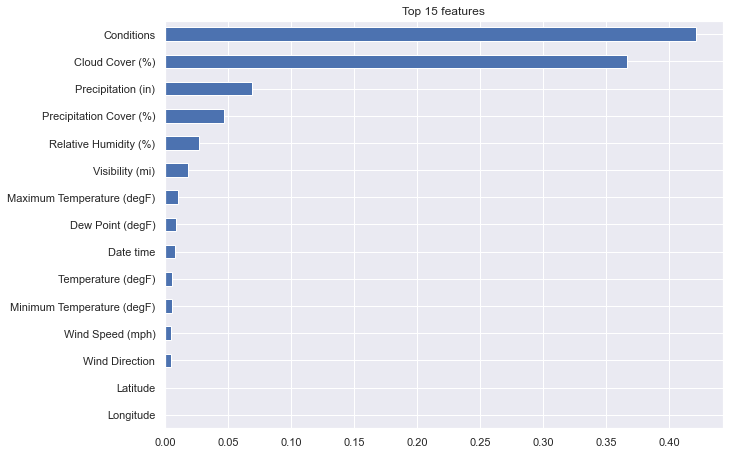

In [579]:
n=15
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [580]:
test_pred = clf.predict(X_test)
test_pred

array([0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0.,
       0., 2., 5., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 2., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 2., 0., 0., 0., 0., 0., 2., 0., 5., 2., 5., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 5., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 5., 2., 5., 0.,
       2., 0., 0., 2., 0., 0., 0., 2., 0., 0., 2., 0., 2., 2., 2., 0., 2.,
       0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 2., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 2., 5., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 0., 0.

In [581]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# summarize the fit of the model
print(metrics.classification_report(y_test, test_predict))
print(metrics.confusion_matrix(y_test, test_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       238
         2.0       0.96      1.00      0.98        55
         3.0       1.00      1.00      1.00         1
         5.0       1.00      0.85      0.92        13

    accuracy                           0.99       307
   macro avg       0.99      0.96      0.97       307
weighted avg       0.99      0.99      0.99       307

[[238   0   0   0]
 [  0  55   0   0]
 [  0   0   1   0]
 [  0   2   0  11]]
